

# Breast Cancer Wisconsin


**Breast cancer is the second leading cause of mortality and the most common type of cancer
among women. Approximately 2.1 million women are globally diagnosed with breast cancer every year. However, early and accurate diagnosis of this disease increases the effectiveness of 
cancer treatment, thereby increasing survival rates.**


**Fine needle aspiration (FNA) is the most common method to diagnose breast cancer. A clinician examines a sample
under a microscope and classifies the sample as benign or malignant. However, 
this method could result in false negatives and false positives through human error. Machine learning can facilitate effective diagnosis of breast cancer through supervised classification algorithms.**

**This notebook conducts exploratory data analysis, data cleaning and predictive modelling using the Breast Cancer Wisconsin Dataset. The objective is to accurately classify benign and malignant samples.**


**The visual characteristics of the digitized samples are described in terms of the size and shape of each cell 
which are the input variables enumerated in the list below.**


1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation")

# 1.  Importing Libraries

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [27]:
# Importing the dataset and drop'id' and 'unnamed' columns as they are irrelevent.
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv').drop(columns=['id','Unnamed: 32'])

# Subsets for predictors and target variable.
X =  df.drop(columns=['diagnosis'])
y = df['diagnosis']

#  2. Exploratory Data Analysis 




**This section employs univariate, bivariate and multivariate analysis using visualizations and summary statistics to detect any trends and patterns within the dataset.**

In [28]:
# Summary Statistics
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [29]:
# All independent variables are continous data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**All independent variables are numeric. There are therefore 30 independent variables that will be used in the analysis. These variables can be divided into 
divided into 3 sections. The first section indicates the mean values of each image, the 
second section indicates the standard error values of each image, while the third indicates worst values. Moreover, there are
ten real-valued independent features for each digitized cell nucleus image. These include radius, 
texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry and 
fractal dimension. Lets take a deeper look into these variables through a univariate and bivariate analysis.** 

# 2.1 Univariate Analysis

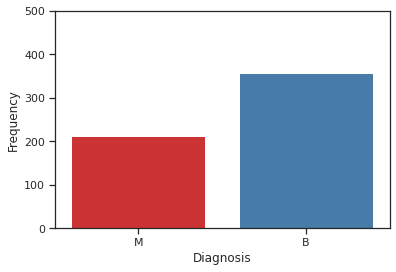

Percentage of Benign Observations:  62.7 %
Percentage of Malignant Observations: 37.3 %


In [30]:
# Lets create a barchart of the response variable
sns.set_style('ticks')
sns.set_palette('Set1')
sns.countplot(data=df, x="diagnosis", order=["M", "B"], palette='Set1')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.ylim([0, 500])
plt.show()


# Proportion of Malignant Vs Benign 
x = df['diagnosis'].value_counts(normalize=True)
print("Percentage of Benign Observations: ", str(x['B'].round(3) * 100), '%')
print("Percentage of Malignant Observations:", str(x['M'].round(3) * 100), '%')

**The response variable is not balanced as the frequency of benign observations is greater than malignant ones. Resampling could be a potential solution.**

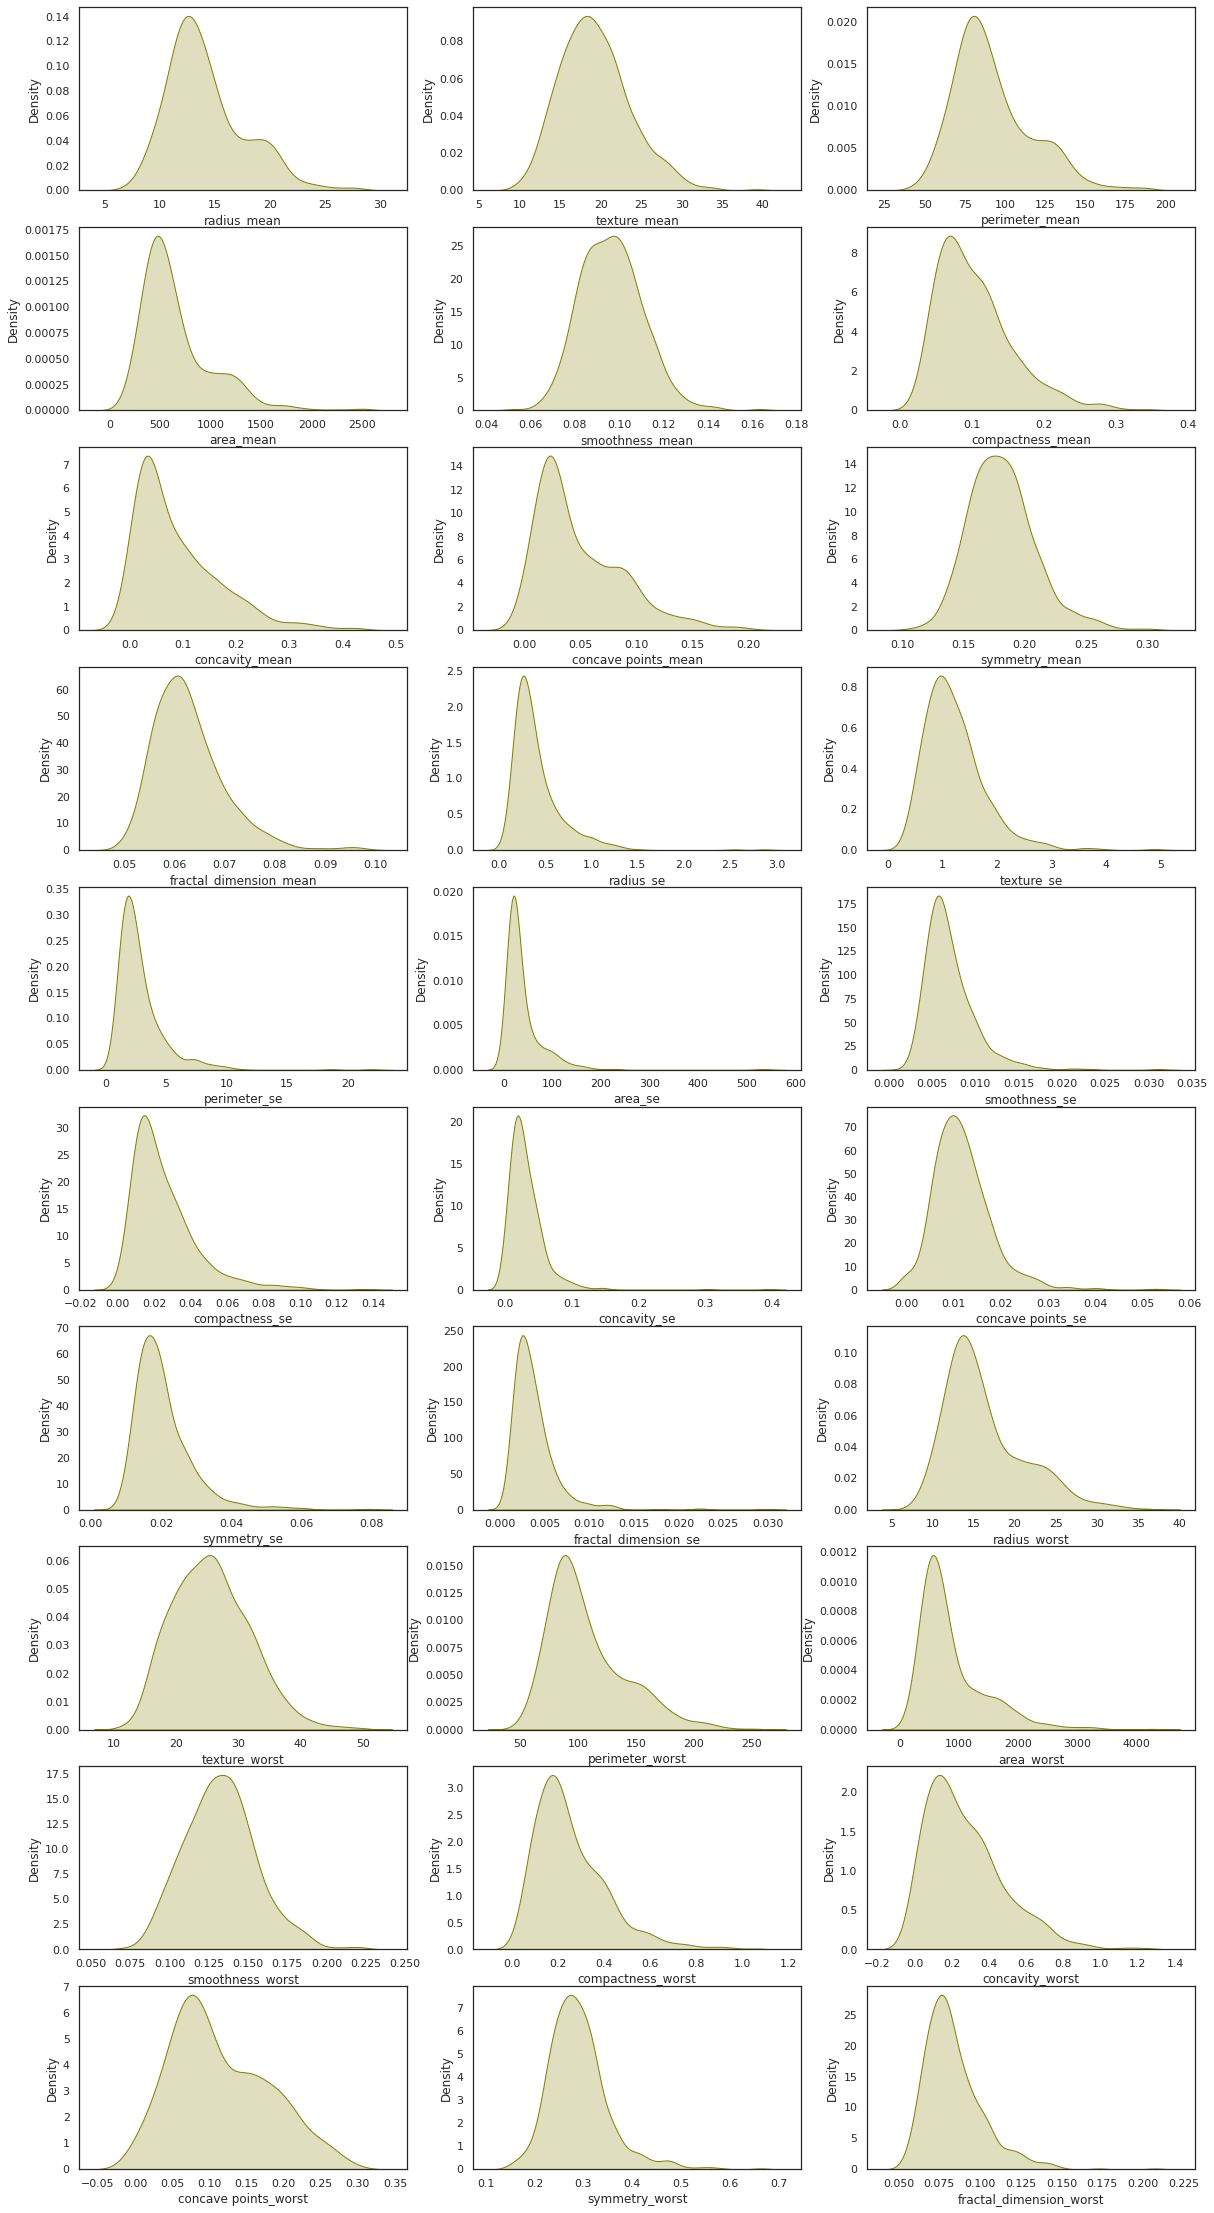

In [31]:
# Kernal Density plots to see the distribution of independent variables.
variables = list(df.columns)
sns.set(style="white") 
plt.figure(figsize = (20 , 60))
independent = variables[1:]
for variable in range(30):
    plt.subplot(15,3 , variable + 1 )
    sns.kdeplot(df[independent[variable]], shade = True, color="olive")
plt.show()

**Some variables indicate positive skewness. It would be interesting to see if there are differences in these independent features with respect to malignant and benign cancer cells. This will be carried out using boxplots and barcharts in the subsequent bivariate analysis section.**

# 2.2 Bivariate Analysis

**This section will employ bivariate visualisations such as bar-charts and box-plots to detect any noticible patterns in malignant and benign tissue samples.**

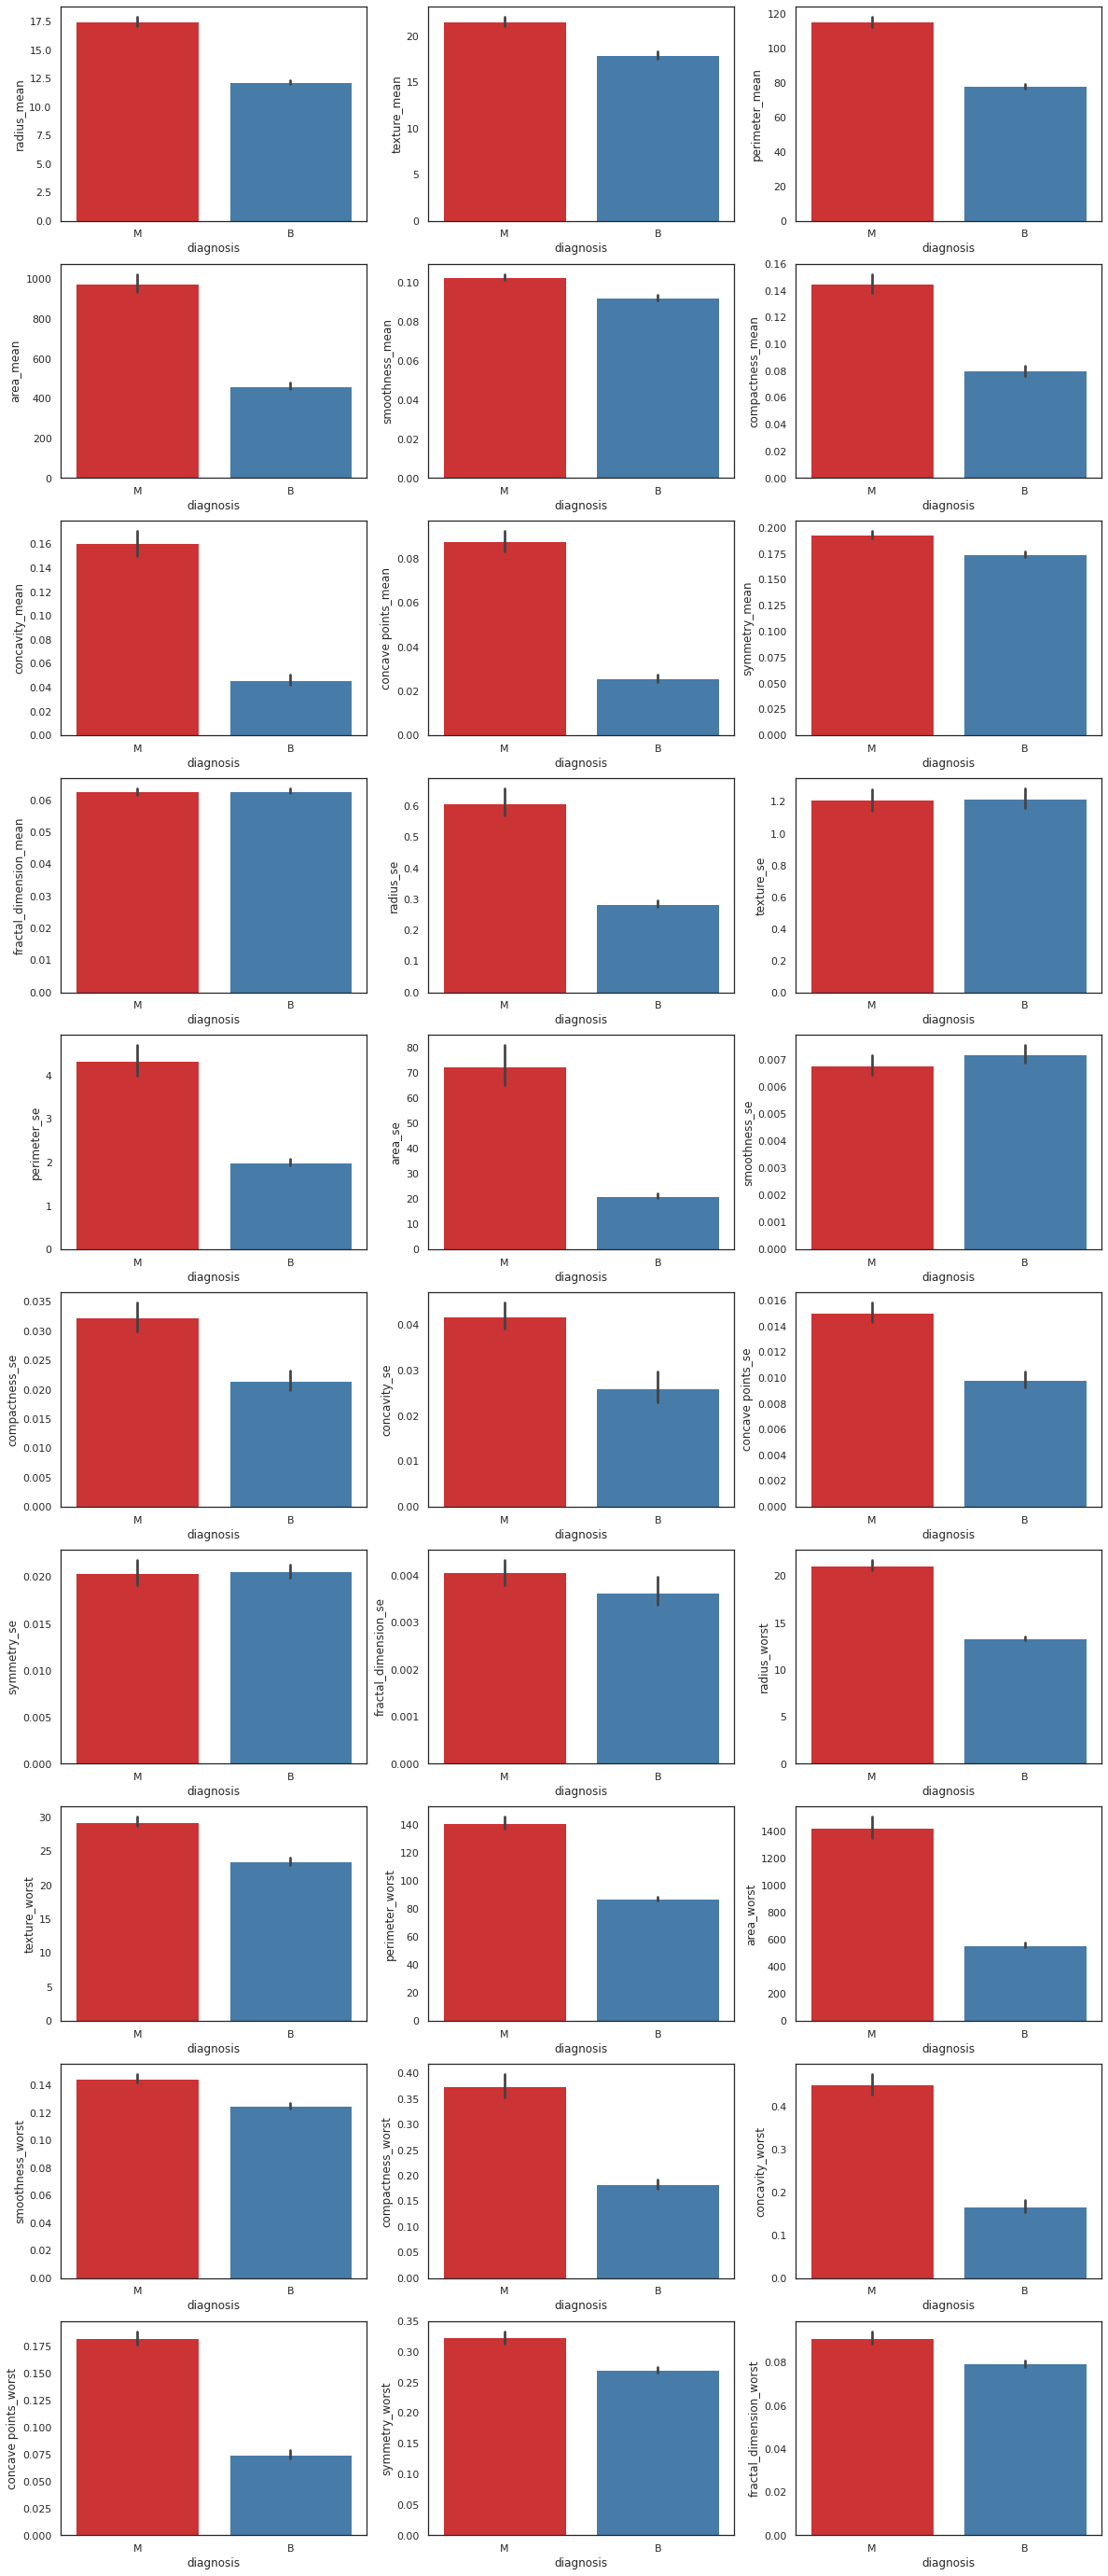

In [32]:
# Barcharts representing malignant and benign cancer cells against independent variables.
sns.set(style="white") 
plt.figure(figsize = (20 , 60))
for variable in range(30):
    plt.subplot(12, 3 , variable + 1)
    sns.barplot(x = df['diagnosis'], y =df[independent[variable]],  palette='Set1' )
plt.show()

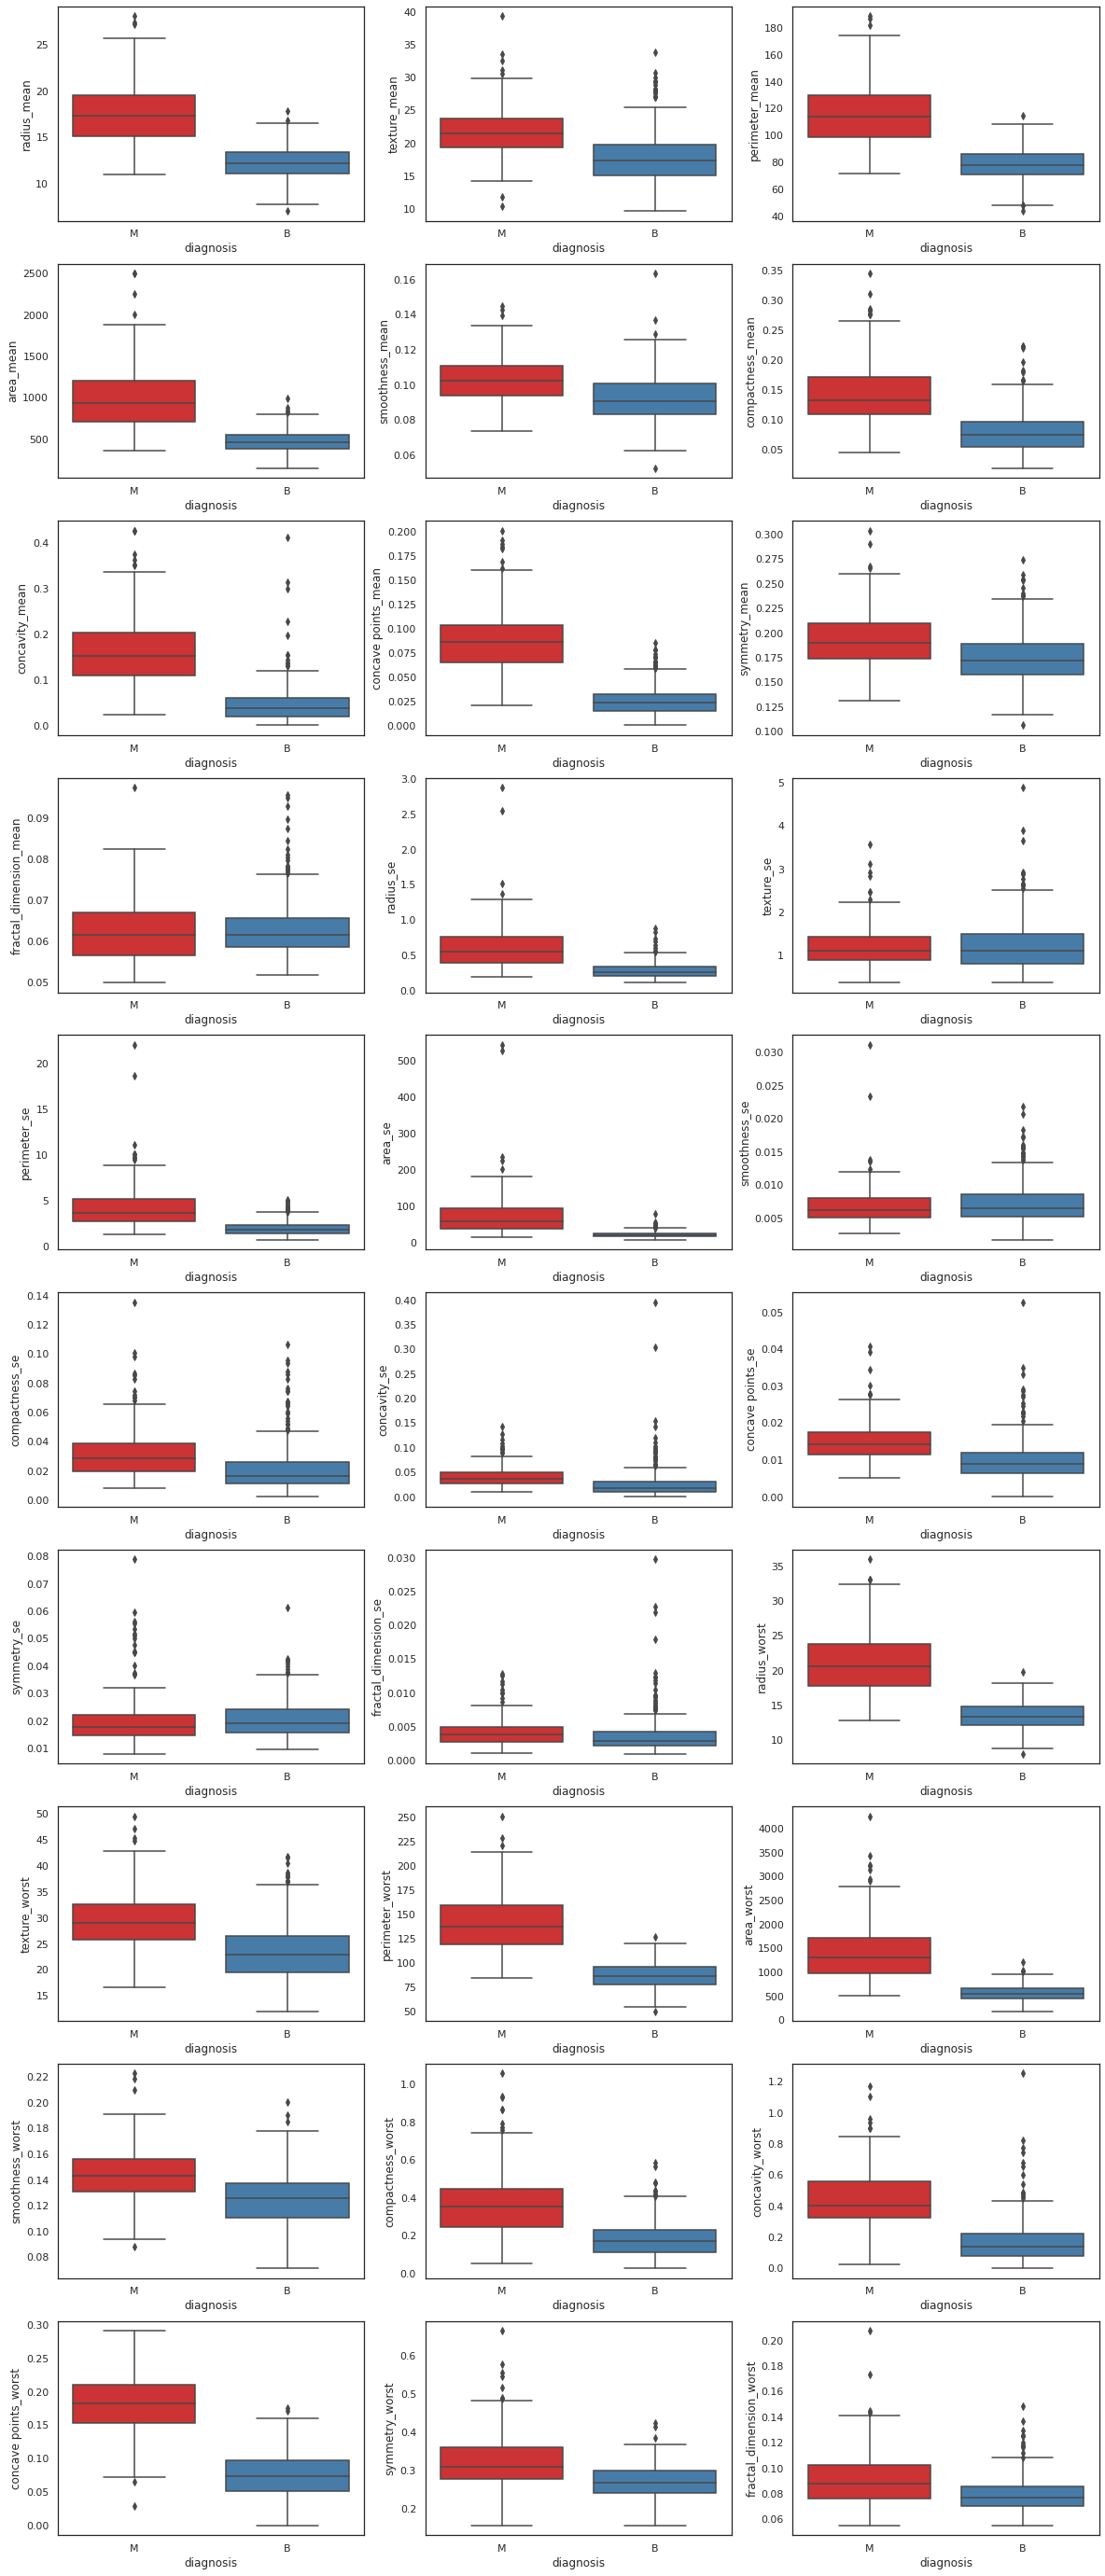

In [33]:
# Boxplots representing malignant and benign cancer cells against independent variables.
sns.set(style="white") 
plt.figure(figsize = (20 , 60))
for variable in range(30):
    plt.subplot(12, 3 , variable + 1)
    sns.boxplot(x = df['diagnosis'], y =df[independent[variable]],  palette='Set1' )
plt.show()

**There is a stark difference in the properties of malignant and benign tissue samples as indicated in the visualizations above. Particularly all the malignant size related features have greater measures of central tendency compared with benign cells. Since majority of the variables relate to shapes and sizes of tissue samples, there is bound to be some multicollinearity amongst features. It would be worth conducting pearsons correlation tests to detect collinearity.**

<AxesSubplot:>

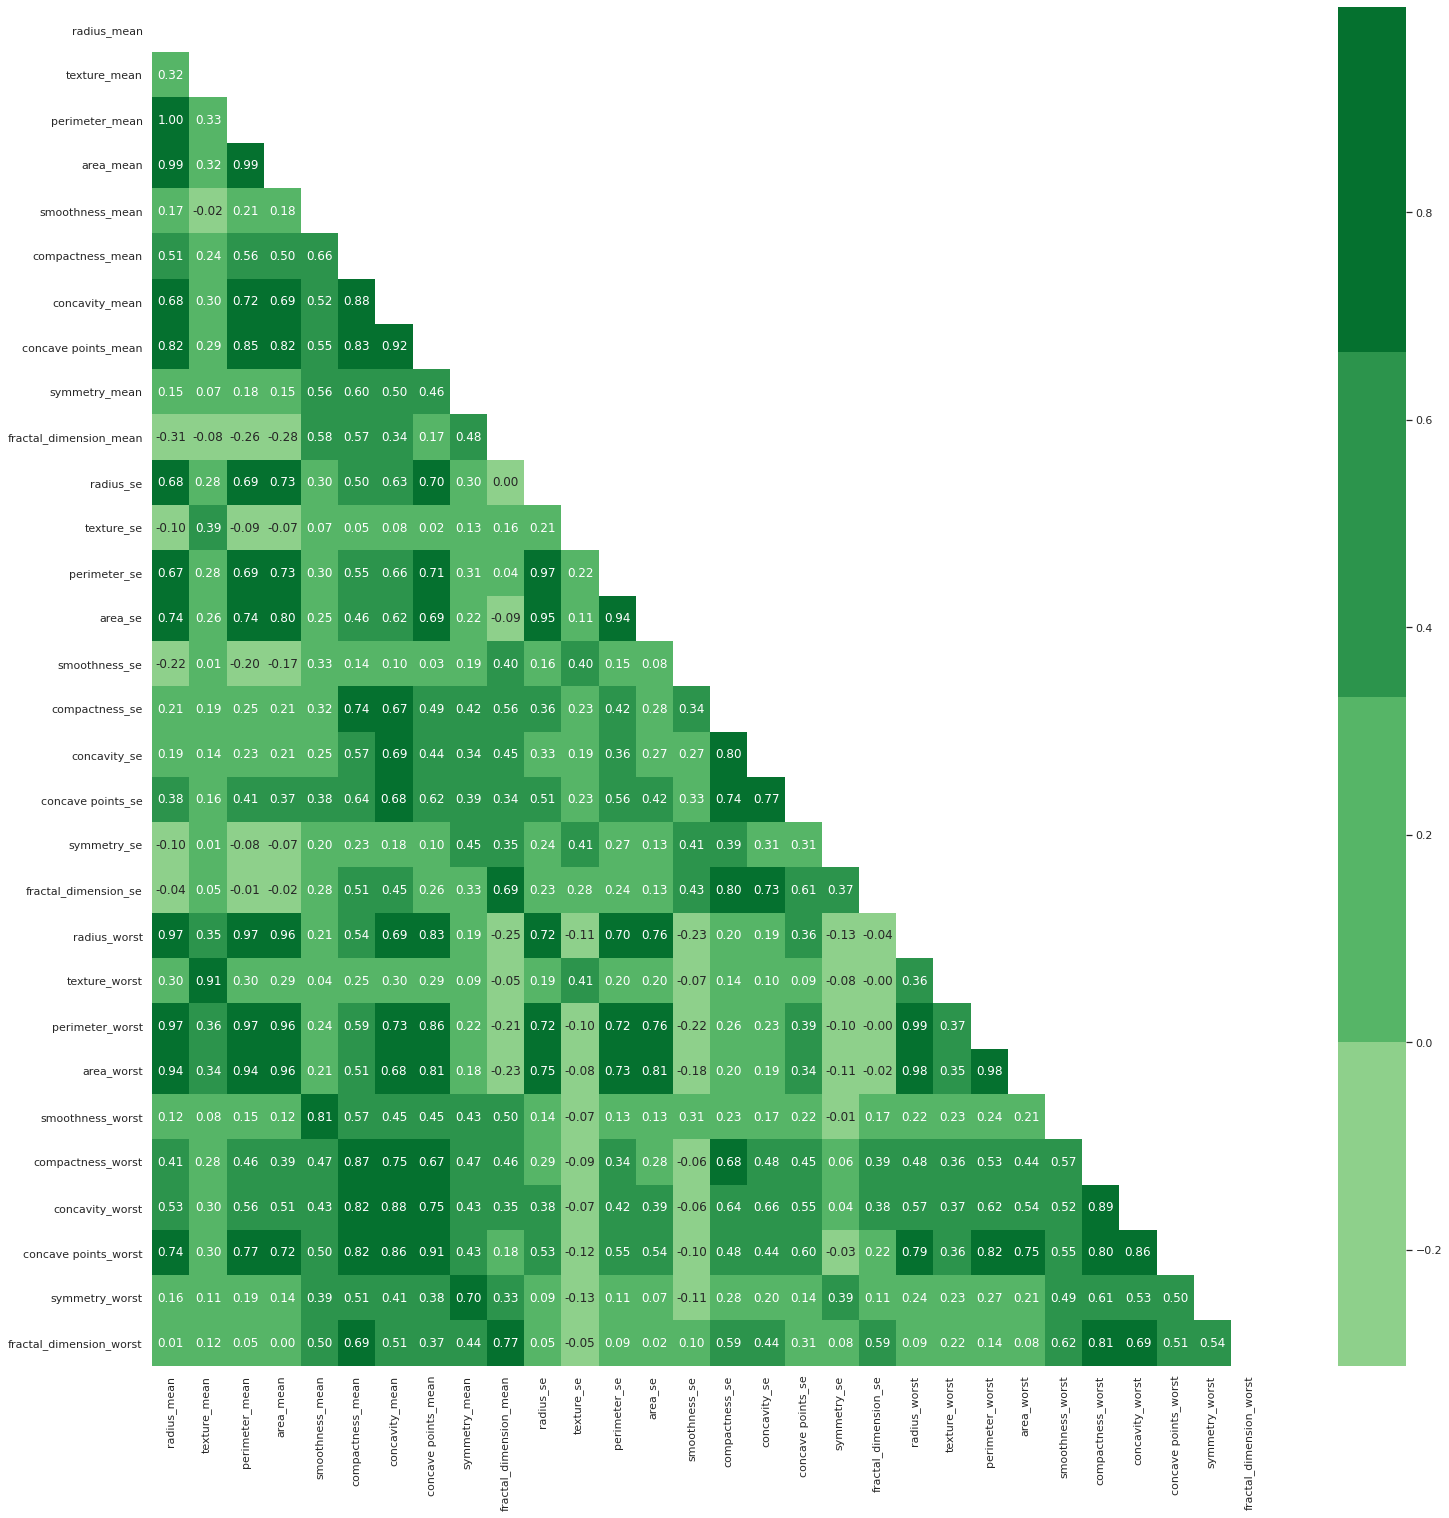

In [34]:
# Let's produce a pearsons correlation correlogram to detect multicollinearity
correlated_var = X.corr()
plt.figure(figsize = (25 , 25))
triangle = np.triu(correlated_var)
colormap = sns.color_palette("Greens")
sns.heatmap(correlated_var, annot = True, center = 0, linecolor = 'black', mask = triangle,fmt='.2f', cmap = colormap)

**The heatmap indicates strong presense of multicollinearity amongst some independent variables. Predictors related to area, perimeter and radius have correlation coefficients upto 0.9. To conduct feature selection, I will remove several variables in the subsequent section.**

# 3. Data Preprocessing

**In this section several preprocessing steps such as feature selection, label encoding, normalization and resampling are carried out.**

In [35]:
# Removing highly correlated features
var = ['perimeter_mean',
       'radius_mean',
       'radius_worst',
       'texture_mean',
       'radius_se',
       'area_se',
       'concave points_mean']

X = X.drop(var, axis = 1)
X = np.array(X)

In [36]:
# Encode 0 and 1 to represent benign and malignant cancer cells  
dict_map =     {'M': 1, 
              'B': 0}

y = y.map(dict_map)

In [37]:
# Splitting the dataset into the Training set and Test set at a ratio of 80% to 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, stratify = None)

In [38]:
# Performing Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# Performing oversampling on training set using SMOTE
counter = Counter(y_train)
print(counter)

# Synthetic Minority Oversampling Technique
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
Counter(y_train).items()

Counter({0: 285, 1: 170})


dict_items([(0, 285), (1, 285)])

# 4. Predictive Modelling

In [40]:
# Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Training
classifier.fit(X_train, y_train)
# Extract predictions
y_pred = classifier.predict(X_test)

# k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
lr = accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('\n', classification_report(y_test, y_pred))

Accuracy: 96.49 %
Standard Deviation: 2.35 %

               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [41]:
# Training the Decision Tree Classification model on the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Training
classifier.fit(X_train, y_train)
# Extract predictions
y_pred = classifier.predict(X_test)

# k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
dt = accuracies.mean()*100
print("\nCV Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('\n', classification_report(y_test, y_pred))




CV Average Accuracy: 94.04 %
Standard Deviation: 4.45 %

               precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [42]:
# Training the K-Nearest Neighbour model on the Training set
classifier = KNeighborsClassifier(n_neighbors = 20, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Training
classifier.fit(X_train, y_train)
# Extract predictions
y_pred = classifier.predict(X_test)

# k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
knn = accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('\n', classification_report(y_test, y_pred))

Accuracy: 94.56 %
Standard Deviation: 3.28 %

               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [43]:
# Training the Random Forest Classification model on the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

# Training
classifier.fit(X_train, y_train)

# Extract predictions
y_pred = classifier.predict(X_test)

# k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
rf = accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('\n', classification_report(y_test, y_pred))

Accuracy: 96.14 %
Standard Deviation: 2.58 %

               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [44]:
# Training the Naive Bayes model on the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Training
classifier.fit(X_train, y_train)
# Extract predictions
y_pred = classifier.predict(X_test)

# k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
nb = accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('\n', classification_report(y_test, y_pred))

Accuracy: 91.05 %
Standard Deviation: 3.63 %

               precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [45]:
# Training the SVM model on the Training set
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Training
classifier.fit(X_train, y_train)
# Extract predictions
y_pred = classifier.predict(X_test)

# k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
svc = accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('\n', classification_report(y_test, y_pred))

Accuracy: 97.37 %
Standard Deviation: 1.80 %

               precision    recall  f1-score   support

           0       1.00      0.99      0.99        72
           1       0.98      1.00      0.99        42

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [46]:
# Training XGBoost on the Training set
classifier = XGBClassifier(use_label_encoder=False, eval_metric = 'logloss')

# Training
classifier.fit(X_train, y_train)
# Extract predictions
y_pred = classifier.predict(X_test)

# k-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
xg = accuracies.mean()*100
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print('\n', classification_report(y_test, y_pred))

Accuracy: 96.67 %
Standard Deviation: 2.14 %

               precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.95      1.00      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [49]:
# List out Model Accuracies in Descending Order.
Algorithm = pd.DataFrame({
    
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'K-nearest Neighbour',  'Random Forest Classifier', 
                  'Naive Bayes', 'Support Vector Classifier',  'XgBoost'],
    
    'Accuracy': [lr, dt, knn, rf, nb, svc, xg] })


al = Algorithm.sort_values(by = 'Accuracy', ascending = False)
print(al)

                   Algorithm   Accuracy
5  Support Vector Classifier  97.368421
6                    XgBoost  96.666667
0        Logistic Regression  96.491228
3   Random Forest Classifier  96.140351
2        K-nearest Neighbour  94.561404
1              Decision Tree  94.035088
4                Naive Bayes  91.052632


**Support Vector Classifier seems to be the winner in terms of predictive accuracy.** **:D**

# CONCLUSION

**It is imperative for health clinics to apply novel strategies that could aid early classification 
and diagnoses of breast cancer. One of the core objectives of a practitioner is to accurately diagnose cancer patients and minimize instances of false positives and false negatives. This analysis clearly indicates that the integration of machine learning in the field of oncology has the potential to improve the decision-making ability of healthcare clinicians.**




# THANK YOU :D